In [262]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

import os
import datetime as dt

import arrow

In [303]:
models_dir = '/home/neil.jethani/patient_embedding/models'
ihm_dir = os.path.join(models_dir, 'decompensation')
pe_dir = os.path.join(models_dir, 'patient_embedding')

['2019-08-15']
['2019-08-15']
['2019-08-15']
['2019-08-15']
['2019-08-15']


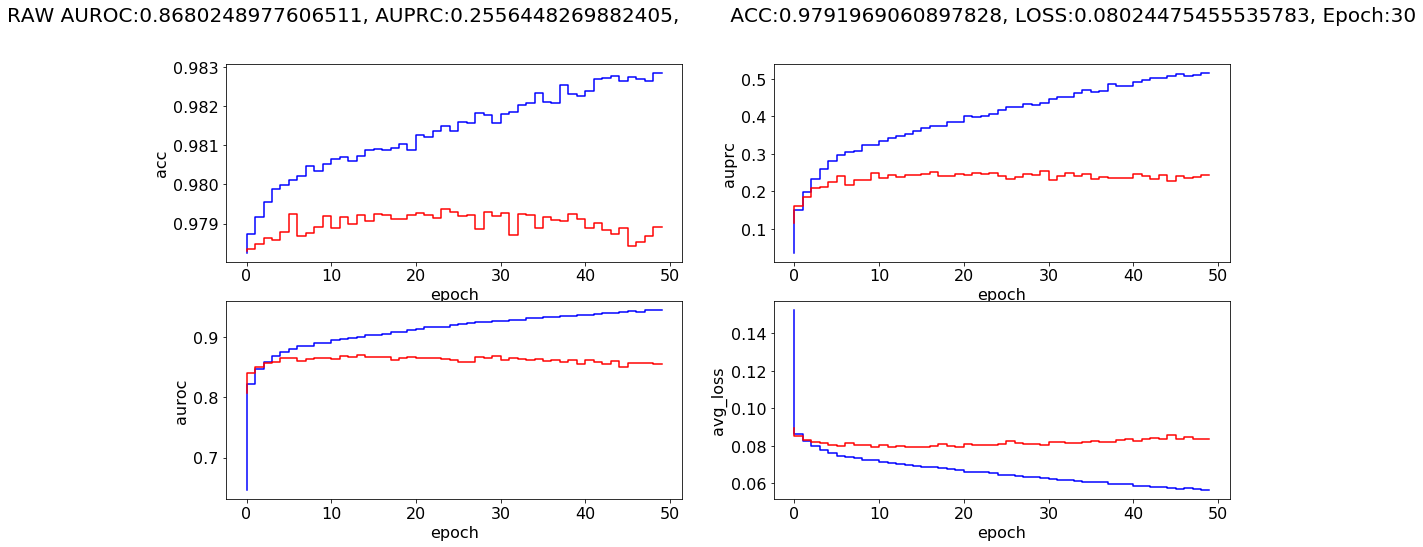

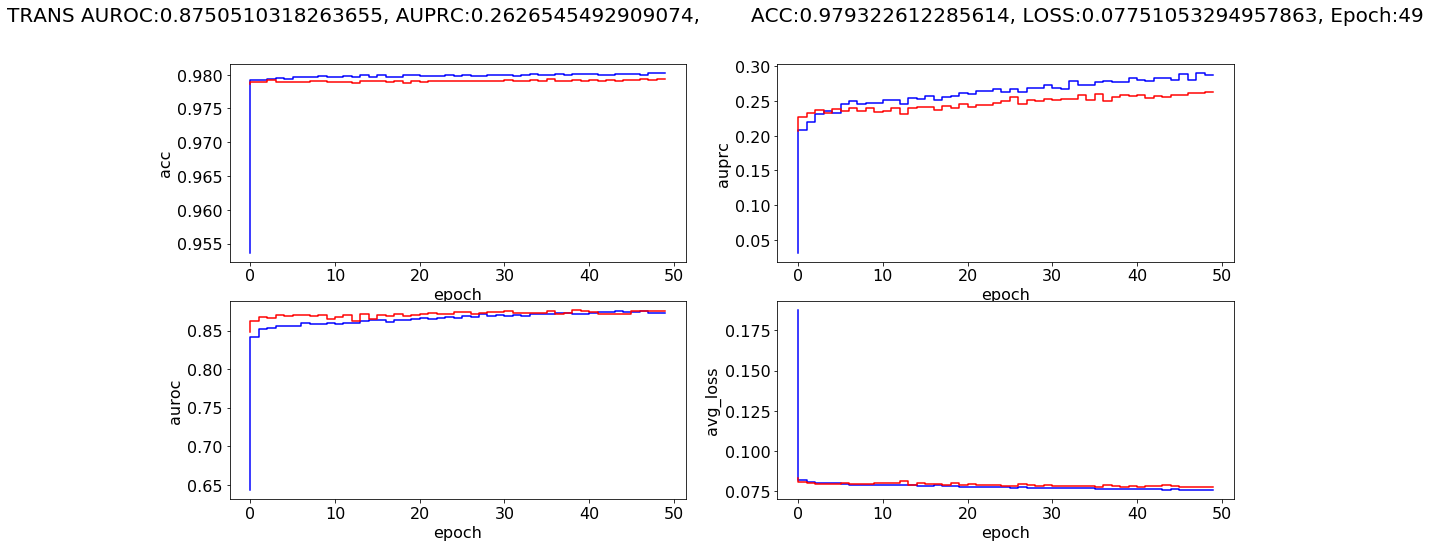

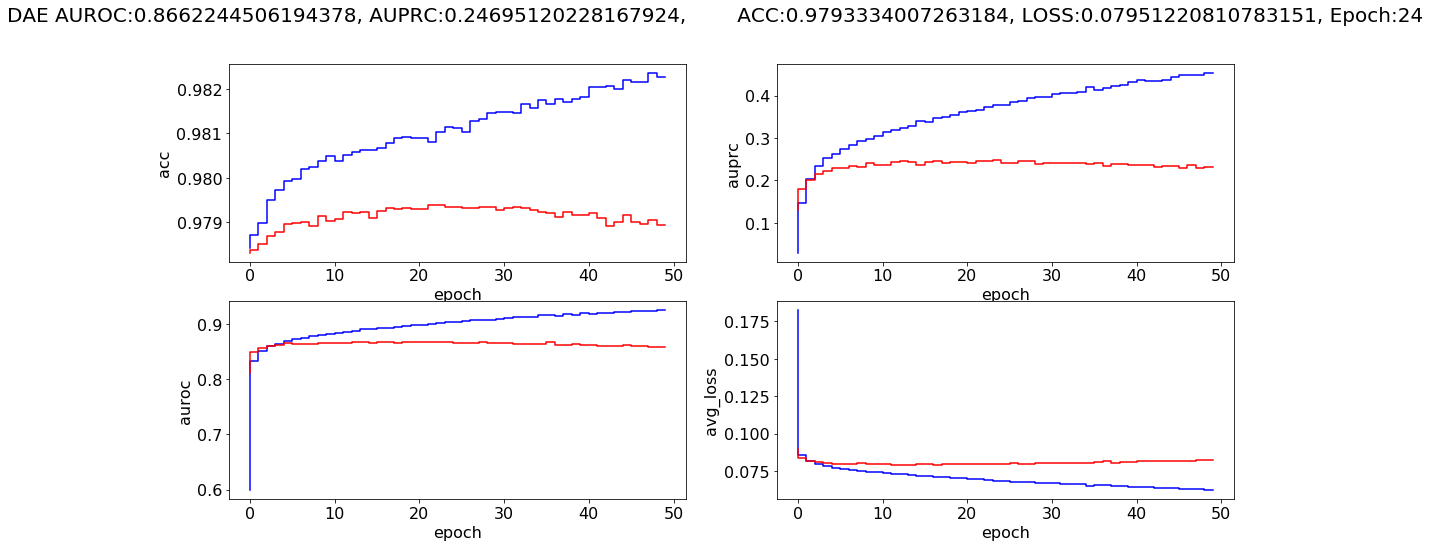

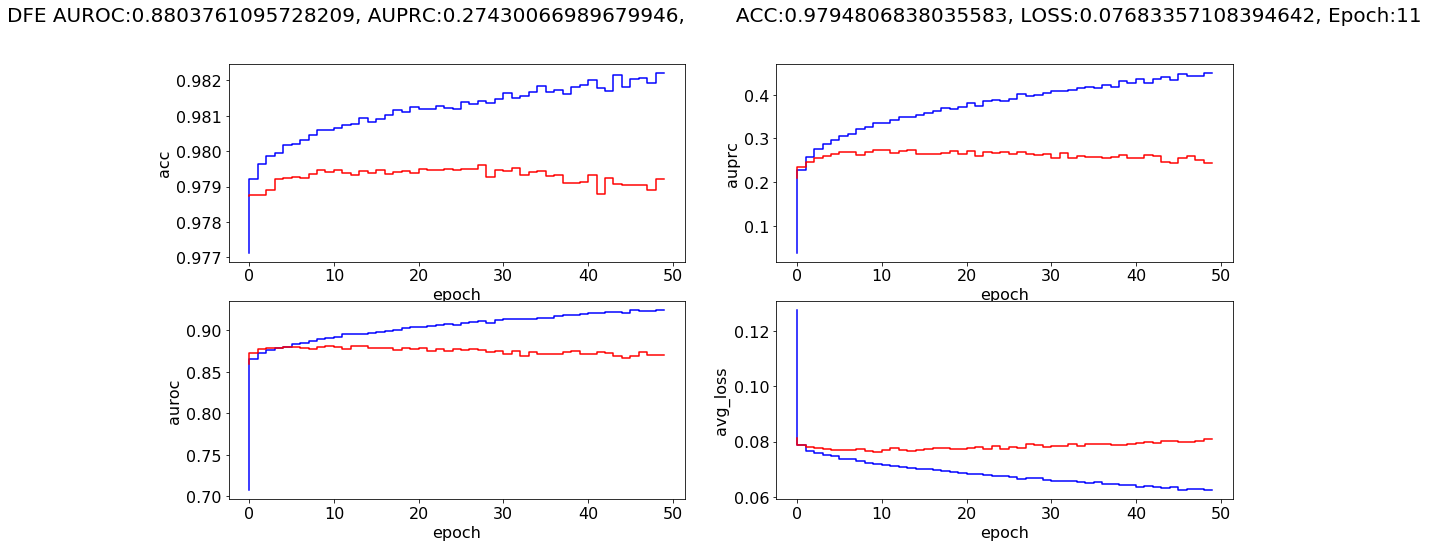

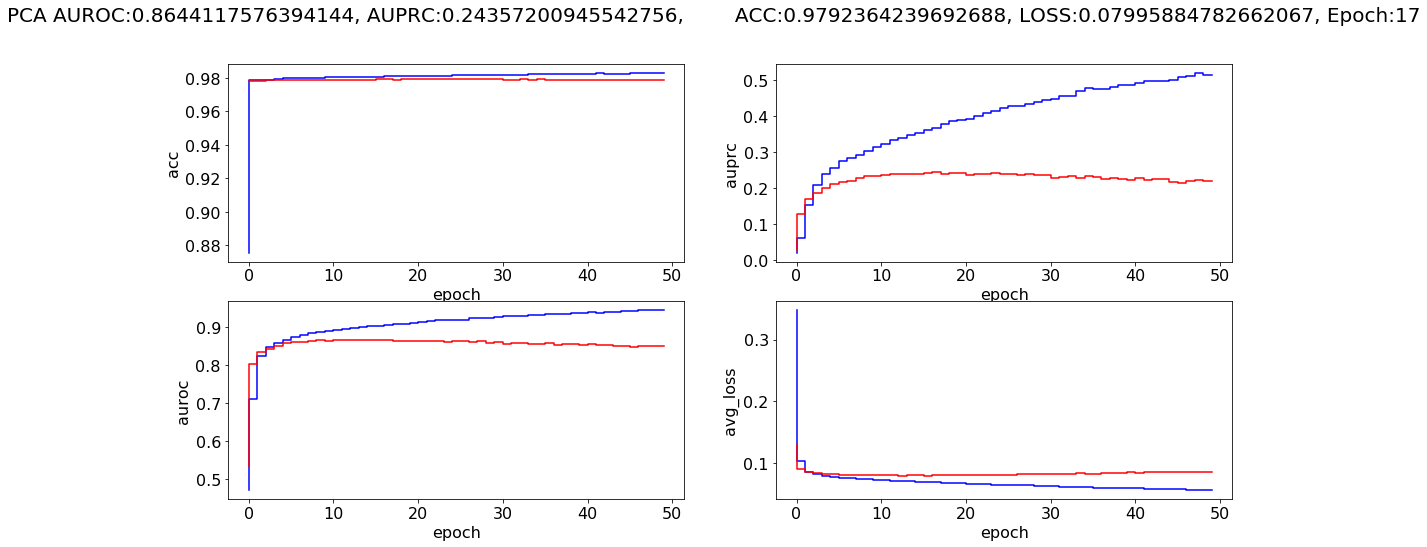

In [304]:
for model in ['RAW', 'TRANS', 'DAE', 'DFE', 'PCA']:
    model_path = os.path.join(ihm_dir, model, "10")
    dates = os.listdir(model_path)
    print(dates)
#     try:
#         model_date = max([dt.datetime.strptime(date, '%Y-%m-%d_%H-%M-%S') for date in dates]).strftime('%Y-%m-%d_%H-%M-%S')
#     except:
#         model_date = max([dt.datetime.strptime(date, '%Y-%m-%d').date() for date in dates])
    if model == 'RAW':
        model_date = '2019-08-15'
    elif model == "TRANS":
        model_date = '2019-08-15'
    elif model == 'DAE':
        model_date = '2019-08-15'
    elif model == 'DFE':
        model_date = '2019-08-15'
    elif model == 'PCA':
        model_date = '2019-08-15'
        
    model_path = os.path.join(model_path, str(model_date))
    metric = pd.read_csv(os.path.join(model_path, 'lossfile.csv'))
    test = metric[metric['dataset']=='test'].loc[0:, :]
    train = metric[metric['dataset']=='train'].loc[0:, :]
    
    fig = plt.figure(figsize=(18,8))
    for i, col in enumerate(['acc', 'auprc', 'auroc', 'avg_loss']): 
        ax = fig.add_subplot(2,2,i+1)
        x_train = train['epoch']
        y_train = train[col]
        x_test = test['epoch']
        y_test = test[col] 
        ax.step(x_train, y_train, color='blue')
        ax.step(x_test, y_test, color='red')
        ax.set_xlabel('epoch')
        max_loc = test['auprc'].idxmax()
        ax.set_ylabel(col)
    fig.suptitle('{} AUROC:{}, AUPRC:{},\
        ACC:{}, LOSS:{}, Epoch:{}'.format(model, test['auroc'][max_loc], test['auprc'][max_loc], 
                                          test['acc'][max_loc], test['avg_loss'][max_loc], 
                                          test['epoch'][max_loc]))
    


In [7]:
pe_dir

'/home/neil.jethani/patient_embedding/models/patient_embedding'

['2019-08-05']
['2019-08-13', '2019-08-07', '2019-07-28', '2019-08-05_20-16-13', '2019-07-31_22-14-09', '2019-07-31_23-11-32', '2019-08-05_15-10-43', '2019-07-26', '2019-08-05_19-53-38', '2019-08-01_18-40-12', '2019-08-05_20-24-07', '2019-07-31']


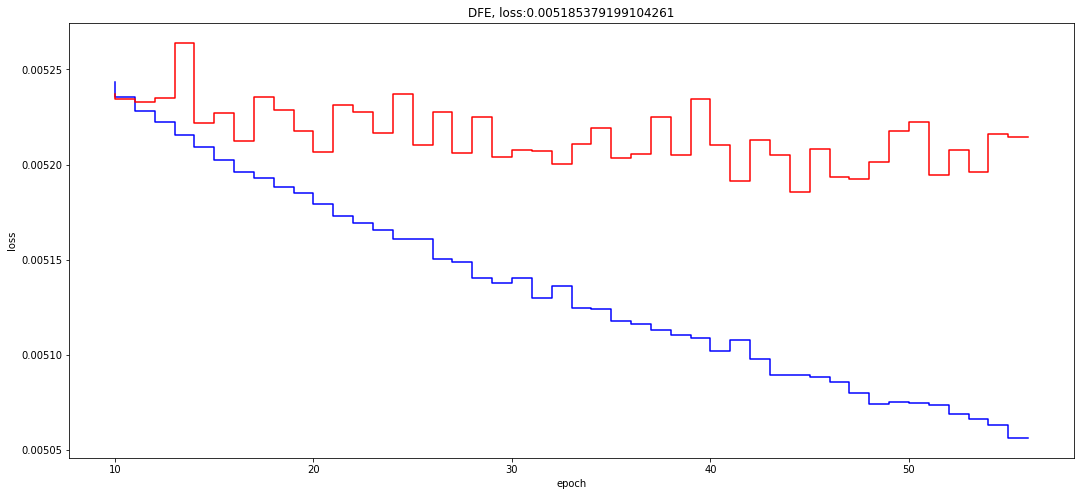

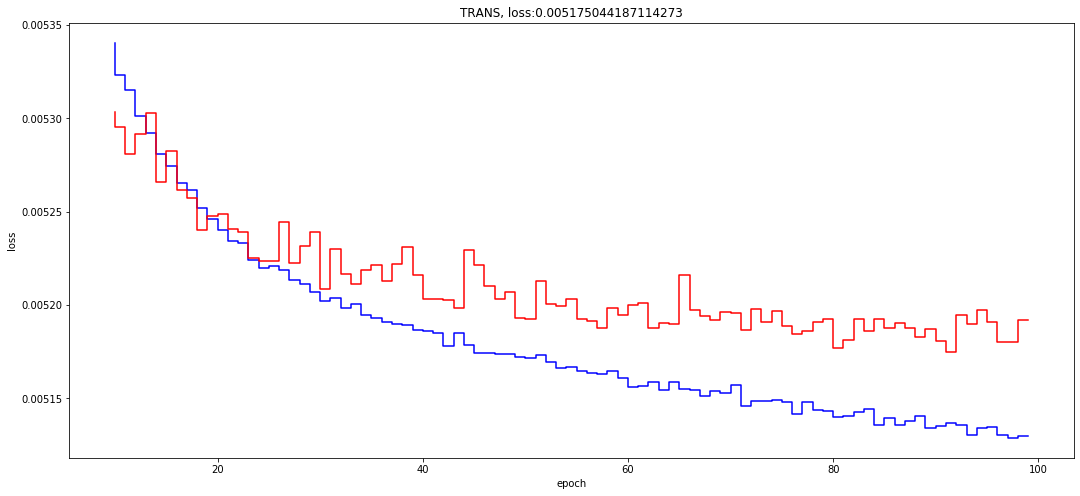

In [104]:
for model in ['DFE', 'TRANS']:
    model_path = os.path.join(pe_dir, model)
    dates = os.listdir(model_path)
    print(dates)
    #if model == 'DAE':
        #model_date = '2019-07-31'
    #else:
    model_dates = []
    for date in dates:
        try:
            model_dates.append(dt.datetime.strptime(date, '%Y-%m-%d'))
        except:
             model_dates.append(dt.datetime.strptime(date, '%Y-%m-%d_%H-%M-%S'))
    model_date = max(model_dates).strftime('%Y-%m-%d_%H-%M-%S')
    if model == 'TRANS':
        model_date = '2019-08-13' #'2019-08-05_20-24-07'#'2019-08-07'#
    elif model == 'DFE':
        model_date = '2019-08-05'
    model_path = os.path.join(model_path, str(model_date))
    metric = pd.read_csv(os.path.join(model_path, 'lossfile.csv')).loc[10:, :]

    plt.figure(figsize=(18,8))
    
    if model != 'TRANS':
        plt.step(metric['epoch'], metric[' train_loss'], color='blue')
        plt.step(metric['epoch'], metric[' test_loss'], color='red')
        min_loss = metric[' test_loss'].min()
    else:
        plt.step(metric['epoch'], metric[' train_PL'], color='blue')
        plt.step(metric['epoch'], metric[' test_PL'], color='red')
        min_loss = metric[' test_PL'].min()
    
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.title('{}, loss:{}'.format(model, min_loss))
    
    

In [296]:
results = {'task':[], 'model':[], 'percent':[], 'auroc':[], 'auprc':[]}
for task in ['extended_length_of_stay', 'decompensation']:
    for model in ['RAW', 'DAE', 'TRANS', 'DFE', 'PCA']:
        for percent in ['1', '5', '10', '25', '50', '100']:
            if percent == '100':
                model_path = os.path.join(models_dir, task, model)
            else:
                model_path = os.path.join(models_dir, task, model, percent)
            dates = []
            for date in os.listdir(model_path):
                try:
                    dates.append(dt.datetime.strptime(date, '%Y-%m-%d').date())
                except:
                    continue
            model_date = max(dates).strftime('%Y-%m-%d')
            model_path = os.path.join(model_path, str(model_date))
            metric = pd.read_csv(os.path.join(model_path, 'lossfile.csv'))
            test = metric[metric['dataset']=='test'].loc[0:, :]
            train = metric[metric['dataset']=='train'].loc[0:, :]
            
            auroc = test['auroc'].max()
            auprc = test['auprc'].max()
            
            results['task'].append(task)
            results['model'].append(model)
            results['percent'].append(int(percent))
            results['auroc'].append(auroc)
            results['auprc'].append(auprc)

results = pd.DataFrame(results)
            
            
            
            


/home/neil.jethani/patient_embedding/models/extended_length_of_stay/RAW/1/2019-08-15
/home/neil.jethani/patient_embedding/models/extended_length_of_stay/RAW/5/2019-08-15
/home/neil.jethani/patient_embedding/models/extended_length_of_stay/RAW/10/2019-08-15
/home/neil.jethani/patient_embedding/models/extended_length_of_stay/RAW/25/2019-08-15
/home/neil.jethani/patient_embedding/models/extended_length_of_stay/RAW/50/2019-08-15
/home/neil.jethani/patient_embedding/models/extended_length_of_stay/RAW/2019-08-13
/home/neil.jethani/patient_embedding/models/extended_length_of_stay/DAE/1/2019-08-15
/home/neil.jethani/patient_embedding/models/extended_length_of_stay/DAE/5/2019-08-15
/home/neil.jethani/patient_embedding/models/extended_length_of_stay/DAE/10/2019-08-15
/home/neil.jethani/patient_embedding/models/extended_length_of_stay/DAE/25/2019-08-15
/home/neil.jethani/patient_embedding/models/extended_length_of_stay/DAE/50/2019-08-15
/home/neil.jethani/patient_embedding/models/extended_length_o

In [293]:
results

,task,model,percent,auroc,auprc
0,extended_length_of_stay,RAW,1,0.681247,0.264064
1,extended_length_of_stay,RAW,5,0.763329,0.317620
2,extended_length_of_stay,RAW,10,0.767778,0.341104
3,extended_length_of_stay,RAW,25,0.778587,0.367553
4,extended_length_of_stay,RAW,50,0.789790,0.378302
5,extended_length_of_stay,RAW,100,0.799663,0.392451
6,extended_length_of_stay,DAE,1,0.758203,0.330267
7,extended_length_of_stay,DAE,5,0.764154,0.341502
8,extended_length_of_stay,DAE,10,0.775832,0.356035
9,extended_length_of_stay,DAE,25,0.787234,0.387176


In [258]:
SMALL_SIZE = 12
MEDIUM_SIZE = 16
BIGGER_SIZE = 20

plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)

In [260]:
vis_dir = '/home/neil.jethani/patient_embedding/vis/PERCENT'

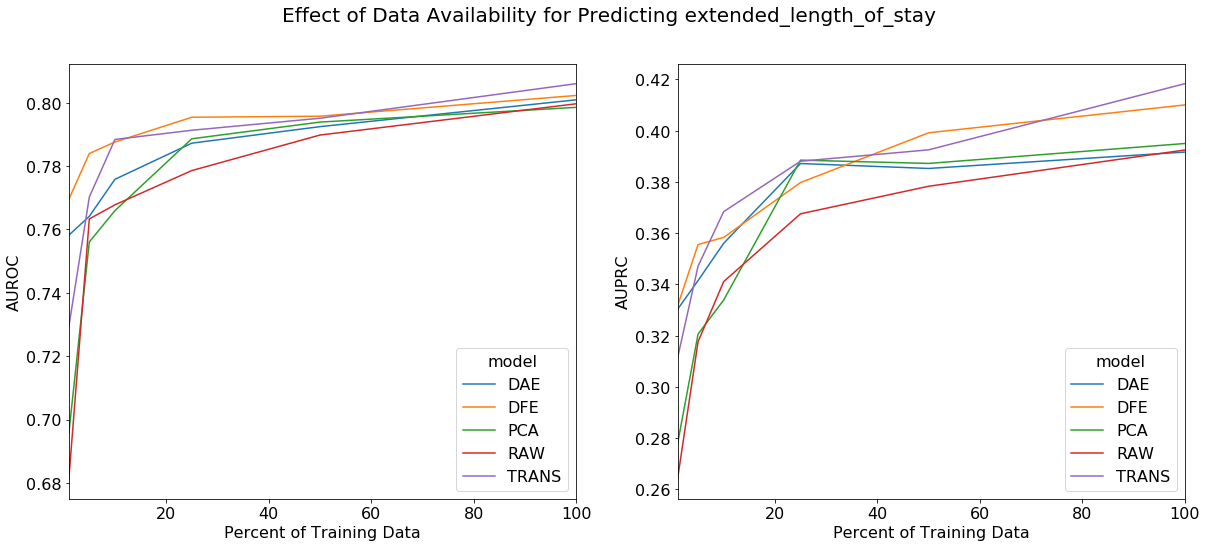

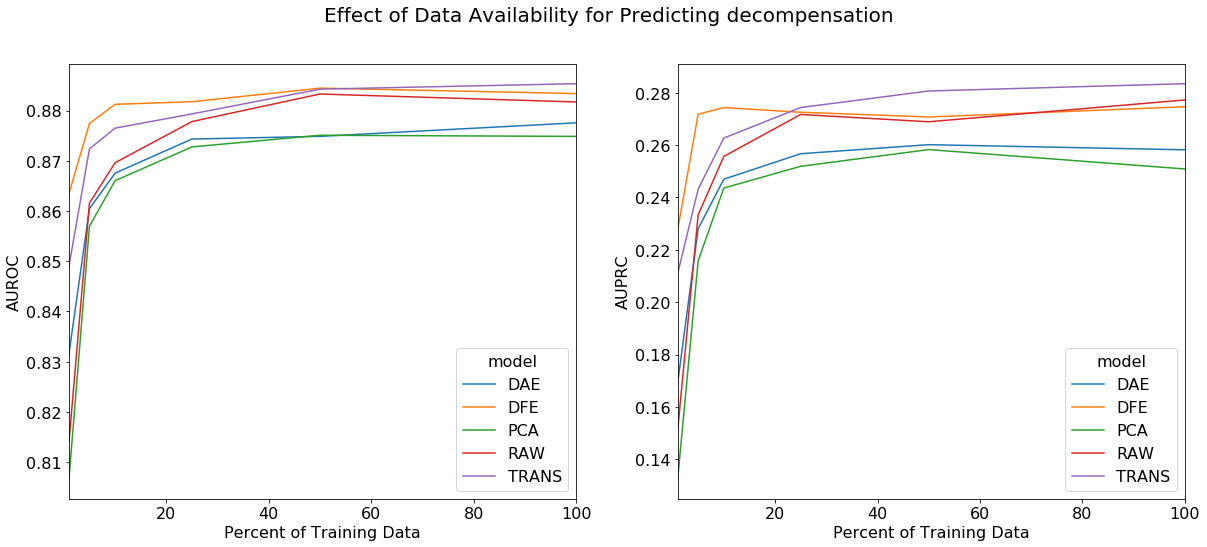

In [298]:
for task in ['extended_length_of_stay', 'decompensation']:
    fig, axs = plt.subplots(1,2)
    fig.set_size_inches(20, 8)
    fig.suptitle('Effect of Data Availability for Predicting {}'.format(task))
    result = results[results['task']==task]
    result.drop(columns=['task'])
    result.pivot(index='percent', columns='model', values='auroc').plot(ax=axs[0])
    result.pivot(index='percent', columns='model', values='auprc').plot(ax=axs[1])
    axs[0].set_ylabel('AUROC')
    axs[1].set_ylabel('AUPRC')
    axs[0].set_xlabel('Percent of Training Data')
    axs[1].set_xlabel('Percent of Training Data')
    save_dir = os.path.join(vis_dir, arrow.now().format('YYYY-MM-DD'))
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)
    plt.savefig(os.path.join(save_dir, '{}.png'.format(task)))
    

In [228]:
for i, model in enumerate(['RAW', 'TRANS', 'DAE', 'DFE', 'PCA']):
        result = results[results['task']==task and results['model']==model]
        x = result['percent']
        auroc = result['auroc']
        auprc = result['auprc']
        ax.step(x_train, y_train, color=i)
        ax.step(x_test, y_test, color='red')
        ax.set_xlabel('epoch')
        max_loc = test['auroc'].idxmax()
        ax.set_ylabel(col)
    fig.suptitle('{} AUROC:{}, AUPRC:{},\
        ACC:{}, LOSS:{}, Epoch:{}'.format(model, test['auroc'][max_loc], test['auprc'][max_loc], 
                                          test['acc'][max_loc], test['avg_loss'][max_loc], 
                                          test['epoch'][max_loc]))
        

,task,model,percent,auroc,auprc
0,in_hospital_mortality,RAW,1,0.777420,0.348411
1,in_hospital_mortality,RAW,5,0.816793,0.417331
2,in_hospital_mortality,RAW,10,0.835324,0.462953
3,in_hospital_mortality,RAW,25,0.848588,0.469722
4,in_hospital_mortality,RAW,50,0.856660,0.495250
5,in_hospital_mortality,RAW,100,0.860513,0.514152
6,in_hospital_mortality,TRANS,1,0.817551,0.417958
7,in_hospital_mortality,TRANS,5,0.842559,0.471586
8,in_hospital_mortality,TRANS,10,0.847072,0.468184
9,in_hospital_mortality,TRANS,25,0.857496,0.472857


In [267]:
data_dir = '/home/neil.jethani/patient_embedding/data'
for task in ['in_hospital_mortality', 'extended_length_of_stay', 'discharge', 'decompensation']:
    listfile = pd.read_csv(os.path.join(data_dir, task, 'val_test', 'listfile.csv'))
    print(task)
    print(listfile.groupby('y_true').count())
    

in_hospital_mortality
        stay
y_true      
0       3195
1        388
extended_length_of_stay
        stay
y_true      
0       3070
1        513
discharge
          stay  period_length
y_true                       
0       221133         221133
1        57239          57239
decompensation
          stay  period_length
y_true                       
0       272332         272332
1         6040           6040


In [272]:
513/3070

0.16710097719869707